# Ejercicio 3: Clasificación de videojuegos por popularidad. | Bosques aleatorios (Random Forest)
### Tatsuki Garcilazo Kato

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
data_file = "vgchartz-2024.csv"
data = pd.read_csv(data_file, encoding="latin1")

# Inspección inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [21]:
# Exploración inicial de los datos
print("Primeras filas del dataset:\n", data.head())
print("\nInformación del dataset:\n", data.info())


Primeras filas del dataset:
                                              img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09  

In [22]:
# Limpieza de datos
# Eliminar columnas irrelevantes (por ejemplo, nombres o fechas si no se usan)
irrelevant_columns = ['img', 'title', 'console', 'genre', 'publisher', 'developer', 'release_date', 'last_update']  
data = data.drop(columns=irrelevant_columns, errors='ignore')

# Manejar valores faltantes
data = data.dropna()

# Verificar las columnas restantes
print(data.columns)

Index(['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales'],
      dtype='object')


In [23]:
# Calculamos la varianza solo en las columnas numéricas
variance = data.var()
print(variance)

critic_score    1.440367
total_sales     4.966117
na_sales        1.205316
jp_sales        0.027142
pal_sales       0.910092
other_sales     0.104176
dtype: float64


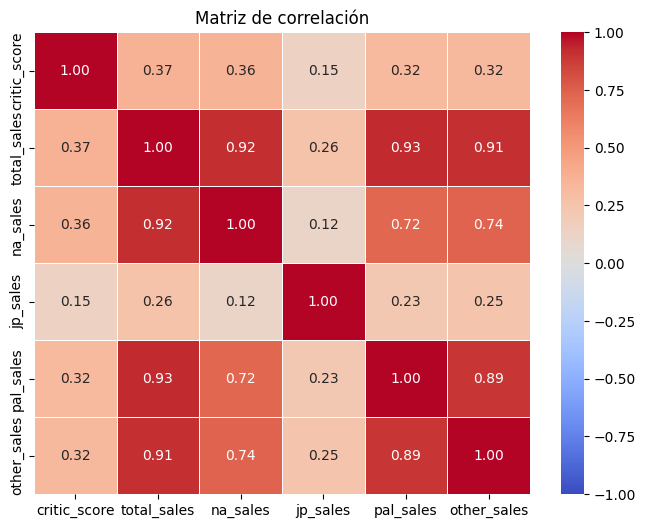

In [24]:
num_cols=data.select_dtypes(include='number').columns.tolist()
   
matriz = data.corr()
    
# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title(f'Matriz de correlación')
plt.show()


Visualizaciones para la columna:  critic_score


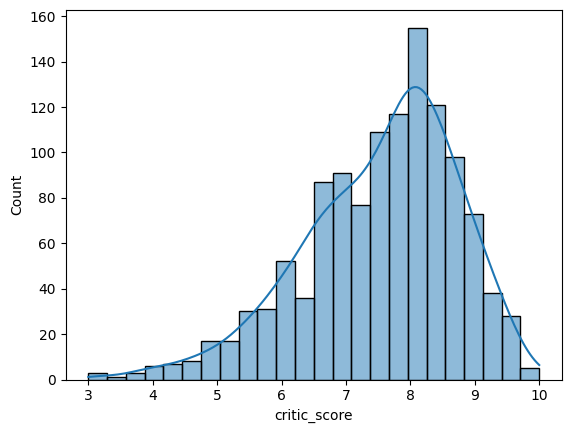

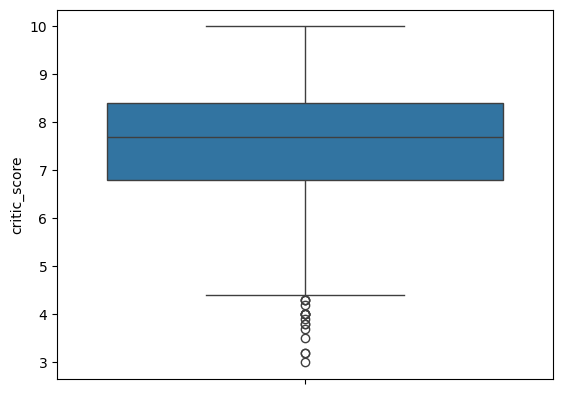


Visualizaciones para la columna:  total_sales


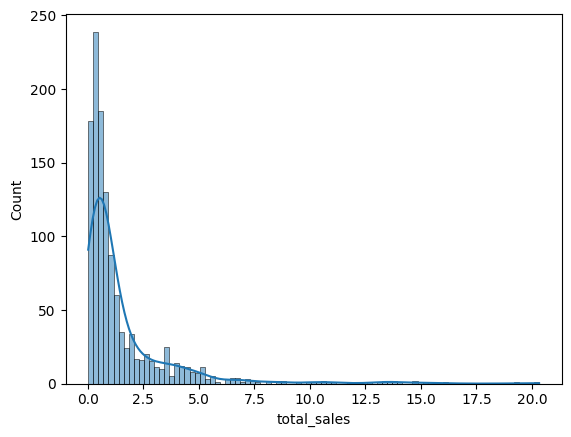

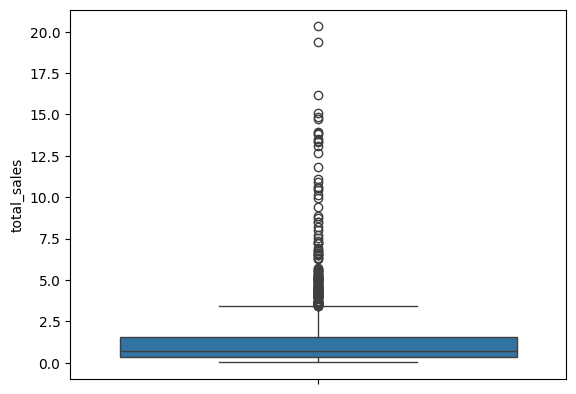


Visualizaciones para la columna:  na_sales


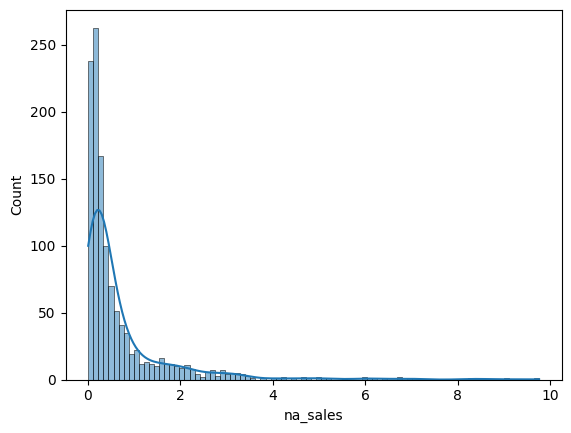

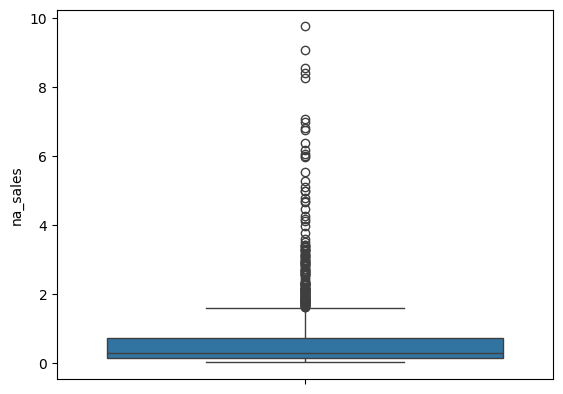


Visualizaciones para la columna:  jp_sales


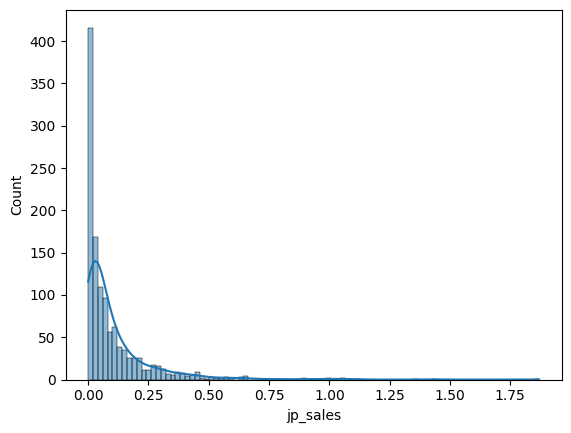

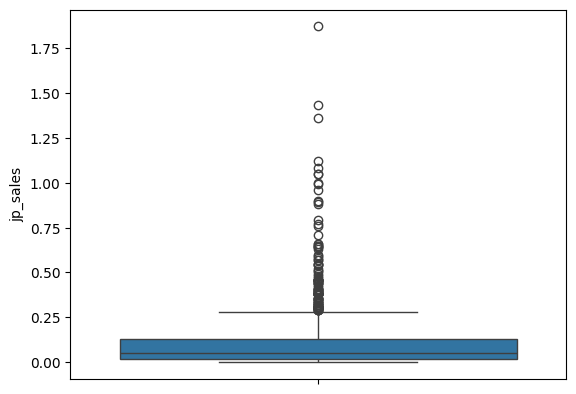


Visualizaciones para la columna:  pal_sales


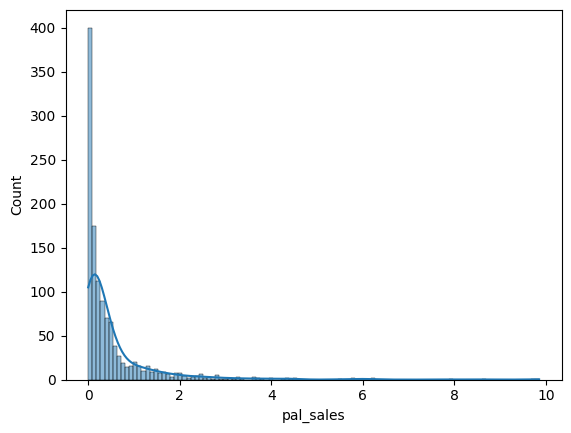

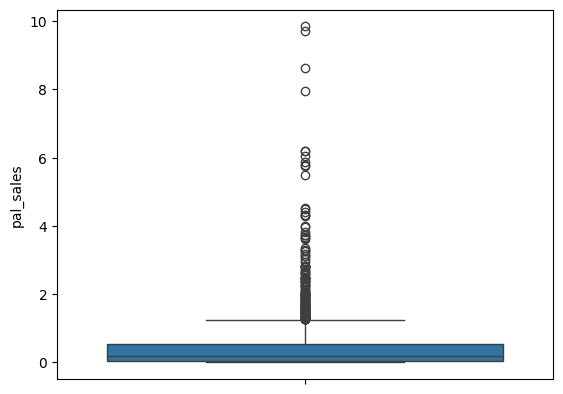


Visualizaciones para la columna:  other_sales


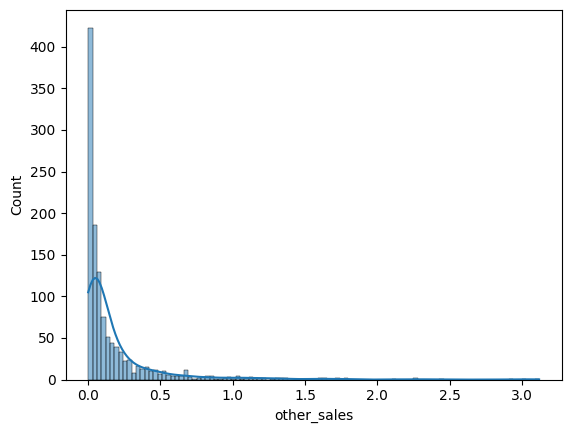

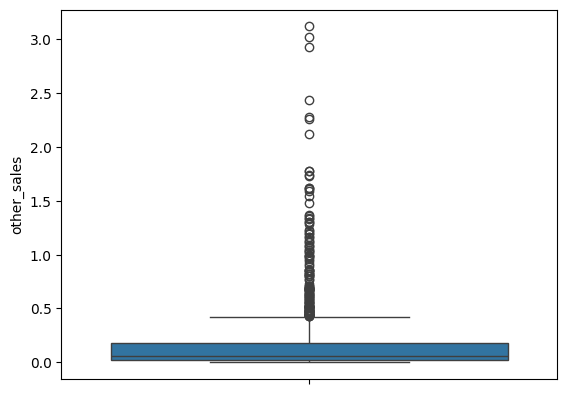

In [25]:
for col in data:
  print('\nVisualizaciones para la columna: ',col)
  sns.histplot(data[col],kde=True) # Mostrando la distribución de los datos
  plt.show()
  sns.boxplot(data[col]) # para ver si hay outliers
  plt.show()

In [32]:
# Función para clasificar popularidad
def classify_popularity(row):
    if row['total_sales'] > 10 and row['critic_score'] > 8:
        return 'Muy populares'
    elif row['total_sales'] > 5 and row['critic_score'] > 5:
        return 'Moderadamente populares'
    else:
        return 'Menos populares'

# Crear etiquetas de popularidad
data['Popularity'] = data.apply(classify_popularity, axis=1)

# Convertir etiquetas a valores numéricos (si es necesario)
label_mapping = {'Menos populares': 0, 'Moderadamente populares': 1, 'Muy populares': 2}
data['Popularity'] = data['Popularity'].map(label_mapping)

# Verificar la distribución de las etiquetas
print(data['Popularity'].value_counts())


Popularity
0    1141
1      51
2      18
Name: count, dtype: int64


In [33]:
# Separar características (X) y etiquetas (y)
X = data.drop(columns=['Popularity'])
y = data['Popularity']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar tamaños
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (847, 6)
Tamaño del conjunto de prueba: (363, 6)


In [34]:
# Entrenar un modelo básico de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluación inicial
y_pred = model.predict(X_test)
print("\nExactitud del modelo base:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación del modelo base:\n", classification_report(y_test, y_pred))



Exactitud del modelo base: 1.0
Reporte de clasificación del modelo base:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363




Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}

Exactitud del modelo optimizado: 1.0
Reporte de clasificación del modelo optimizado:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       341
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363



C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tatsu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

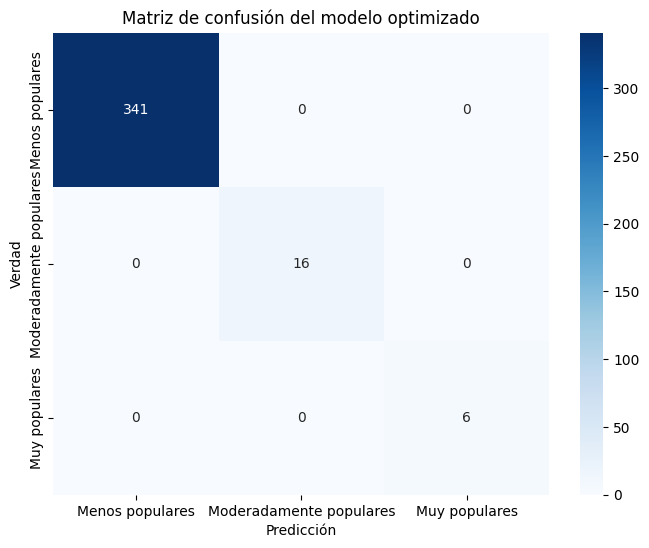

In [35]:
# Optimización del modelo con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluar el modelo optimizado
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nMejores parámetros encontrados:", grid_search.best_params_)
print("\nExactitud del modelo optimizado:", accuracy_score(y_test, y_pred_best))
print("Reporte de clasificación del modelo optimizado:\n", classification_report(y_test, y_pred_best))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de confusión del modelo optimizado")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()


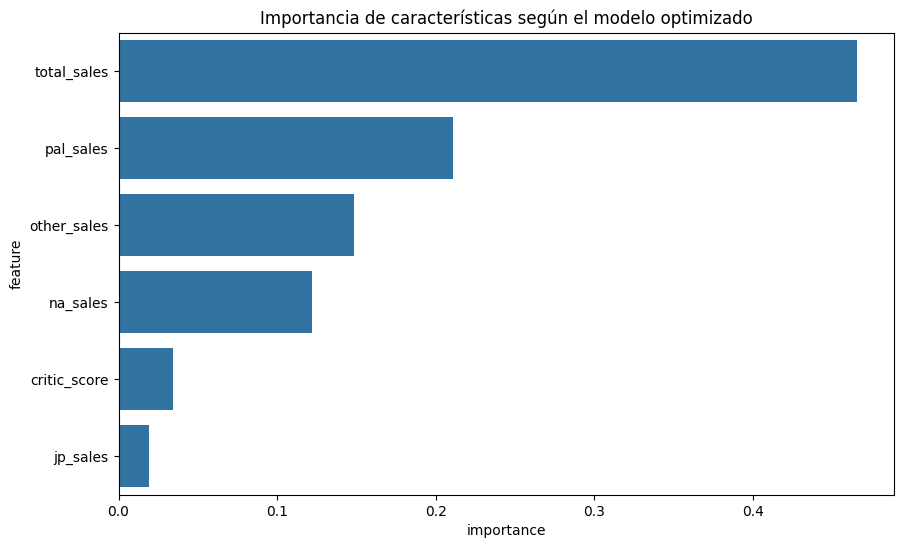

In [36]:
# Importancia de características
importances = best_model.feature_importances_
feature_names = X.columns
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importances_df)
plt.title("Importancia de características según el modelo optimizado")
plt.show()


## Conclusión
Podemos apreciar en las gráficas presentadas que el modelo se adaptó muy bien a los datos y hace predicciones correctamente, presentando errores muy bajos.